# **SnP 데이터**

In [3]:
#SnP 데이터
import pandas as pd

ownership = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/ownership.parquet'
professional = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/professional.parquet'
keydev = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/keydev.parquet'
exchangerate = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/exchangerate.parquet'
estimates = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/estimates.parquet'
company = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/company.parquet'
transcript = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/transcript.parquet'
financial = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/financials.parquet'
market = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/S&P data/market.parquet'

#pd.read_parquet(ownership)
#pd.read_parquet(professional)
#pd.read_parquet(keydev)
#pd.read_parquet(exchangerate)
#pd.read_parquet(estimates)
#pd.read_parquet(company)
#pd.read_parquet(transcript)
#pd.read_parquet(market)

## **15, 30, 45개 자산 추출(Chat GPT-4)**
S&P500 Index 구성종목 중에서, Ghat GPT의 데이터를 기반으로 S&P500 Index보다 뛰어난 퍼포먼스를 낼 수 있는 15, 30, 45개 종목으로 구성된 포트폴리오를 추출하라는 명령 수행.

Chat gpt-4.0에 다음과 같이 prompt를 입력: 

Prompt 1: "Using a range of investing principles taken from leading funds, create a theoretical fund comprising of at least X stocks (mention their tickers) from the S&P500 with the goal to outperform the S&P500 index" (X is 15, 30 or 45 for the three cases);

Prompt 2: "Extract only the ticker symbols of the stocks comprising the fund from the previous response: - '{input}'. In your response to this prompt, list only the ticker symbols separated by spaces" (here the output response of prompt 1 was used in place of {input});

X = 15, 30, 45 로 각각 30번씩 수행 후, 가장 높은 빈도의 상위 15, 30, 45개 종목 리스트 추출



**이건 실수인데, prompt 1, 2를 함께 실행했어야함. 그러면 리스트로 애초에 티커가 나왔을 듯. 그렇게 되면 아래 빈도확인하는 코드는 필요없음.**

In [6]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

yf.pdr_override()

In [7]:
# 15개 자산 티커 빈도 확인


file_path = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/SnP/15개 자산 티커.xlsx'

# 엑셀 파일 읽기
try:
    data = pd.read_excel(file_path)
except Exception as e:
    data = str(e)

# 티커들의 빈도수 확인 및 빈도수대로 정렬
ticker_frequency = data['MSFT'].value_counts().sort_values(ascending=False)

top_15_tickers = ticker_frequency.head(15).index.tolist()

print(top_15_tickers)


['AAPL', 'AMZN', 'NVDA', 'JPM', 'PG', 'PFE', 'JNJ', 'KO', 'XOM', 'NEE', 'GOOGL', 'MSFT', 'TSLA', 'NKE', 'BAC']


In [8]:
# 30개 자산 티커 빈도 확인

file_path = '/Users/jaekyunpark/Library/CloudStorage/OneDrive-경희대학교/JaekyunPark/SnP/30개 자산 티커.xlsx'  

try:
    data = pd.read_excel(file_path)
except Exception as e:
    print(e)

# 모든 열에 대해 티커의 빈도수를 계산하고, 합산하여 전체 빈도수를 계산
ticker_frequency = data.apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)

# 가장 빈도가 높은 상위 30개의 티커를 리스트로 추출
top_30_tickers = ticker_frequency.head(30).index.tolist()

print(top_30_tickers)



['MSFT', 'AMZN', 'JNJ', 'PFE', 'JPM', 'NVDA', 'AAPL', 'CAT', 'CVX', 'NKE', 'PG', 'GS', 'NEE', 'KO', 'MRK', 'TSLA', 'BA', 'VZ', 'GOOGL', 'CRM', 'ADBE', 'UNH', 'WMT', 'QCOM', 'BRK.B', 'V', 'ABT', 'MCD', 'INTC', 'XOM']


### **Chat GPT에 위 포트폴리오들의 가중치 배분 요청 (GPT-weighted 포트폴리오)**

Chat gpt-4.0에 다음과 같이 prompt를 입력: 

Prompt 3: "Assume you're designing a theoretical model portfolio from these S&P500 stocks:
{input}. Provide a hypothetical example of how you might distribute the weightage of these stocks (normalized, i.e., weights should add up to 1.00) in the portfolio to potentially outperform the S&P500 index. Also mention the underlying strategy or logic which you used to assign these weights. only use default mode." 

Prompt 4: "Extract tickers of stocks and corresponding weights as a single comma ',' separated string, with the weights expressed as floats: '{input}' " (here the output response of prompt 3 was used in place of {input}).

여기서 {input}은 이전 프롬프트에서 가장 자주 등장하는 X(15,30,45)개의 주식 티커 리스트임

### **주의할점**

논문에서 제공하는 기존 프롬프트에서 only use default mode 라는 말을 추가함. 이유는, data analysis를 자동으로 사용해서 오류가 발생하면 자동으로 그냥 1/n 포트폴리오를 반환하는 경우가 있었기 때문.

### **결과**
15개 자산 pfo

AAPL: 0.084
AMZN: 0.074
NVDA: 0.064
JPM: 0.054
PG: 0.054
PFE: 0.064
JNJ: 0.064
KO: 0.054
XOM: 0.064
NEE: 0.074
GOOGL: 0.084
MSFT: 0.084
TSLA: 0.074
NKE: 0.054
BAC: 0.054

30개 자산 pfo

MSFT: 0.067
AMZN: 0.067
NVDA: 0.067
AAPL: 0.067
GOOGL: 0.067
ADBE: 0.067
JNJ: 0.05
PFE: 0.05
MRK: 0.05
ABT: 0.05
PG: 0.05
KO: 0.05
JPM: 0.05
GS: 0.05
CAT: 0.025
CVX: 0.025
XOM: 0.025
BA: 0.025
TSLA: 0.025
NEE: 0.025
NKE: 0.005
VZ: 0.005
CRM: 0.005
UNH: 0.005
WMT: 0.005
QCOM: 0.005
BRK.B: 0.005
V: 0.005
MCD: 0.005
INTC: 0.005

## **GPT-weighted 포트폴리오들의 누적 수익률 계산 (In-sample 기간)**

In [10]:
#15개 자산 pfo

stocks_15 = {
    "AAPL": 0.084,
    "AMZN": 0.074,
    "NVDA": 0.064,
    "JPM": 0.054,
    "PG": 0.054,
    "PFE": 0.064,
    "JNJ": 0.064,
    "KO": 0.054,
    "XOM": 0.064,
    "NEE": 0.074,
    "GOOGL": 0.084,
    "MSFT": 0.084,
    "TSLA": 0.074,
    "NKE": 0.054,
    "BAC": 0.054
}

start_date = '2018-05-01'
end_date = '2023-04-30'

# 각 주식의 주간 조정 종가 데이터를 가져오는 함수
def get_weekly_adjusted_prices(ticker):
    data = yf.download(ticker, start=start_date, end=end_date, interval='1wk')
    return data['Adj Close']

# 모든 주식에 대한 데이터 프레임을 생성
all_prices_15 = pd.DataFrame({ticker: get_weekly_adjusted_prices(ticker) for ticker in stocks_15.keys()})

# 각 주식의 주간 수익률 계산
weekly_returns = all_prices_15.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_15 = weekly_returns.dot(pd.Series(stocks_15))

# 누적 수익률 계산
cumulative_returns_15 = (1 + portfolio_returns_15).cumprod()

print(cumulative_returns_15.tail())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [11]:
#30개 자산 pfo

stocks_30 = {
    "MSFT": 0.067,
    "AMZN": 0.067,
    "NVDA": 0.067,
    "AAPL": 0.067,
    "GOOGL": 0.067,
    "ADBE": 0.067,
    "JNJ": 0.05,
    "PFE": 0.05,
    "MRK": 0.05,
    "ABT": 0.05,
    "PG": 0.05,
    "KO": 0.05,
    "JPM": 0.05,
    "GS": 0.05,
    "CAT": 0.025,
    "CVX": 0.025,
    "XOM": 0.025,
    "BA": 0.025,
    "TSLA": 0.025,
    "NEE": 0.025,
    "NKE": 0.005,
    "VZ": 0.005,
    "CRM": 0.005,
    "UNH": 0.005,
    "WMT": 0.005,
    "QCOM": 0.005,
    "BRK-B": 0.005,
    "V": 0.005,
    "MCD": 0.005,
    "INTC": 0.005
}


start_date = '2018-05-01'
end_date = '2023-04-30'

# 각 주식의 주간 조정 종가 데이터를 가져오는 함수
def get_weekly_adjusted_prices(ticker):
    data = yf.download(ticker, start=start_date, end=end_date, interval='1wk')
    return data['Adj Close']

# 모든 주식에 대한 데이터 프레임을 생성
all_prices_30 = pd.DataFrame({ticker: get_weekly_adjusted_prices(ticker) for ticker in stocks_30.keys()})

# 각 주식의 주간 수익률 계산
weekly_returns = all_prices_30.pct_change().dropna()

# 포트폴리오 수익률 계산
portfolio_returns_30 = weekly_returns.dot(pd.Series(stocks_30))

# 누적 수익률 계산
cumulative_returns_30 = (1 + portfolio_returns_30).cumprod()

print(cumulative_returns_30.tail())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

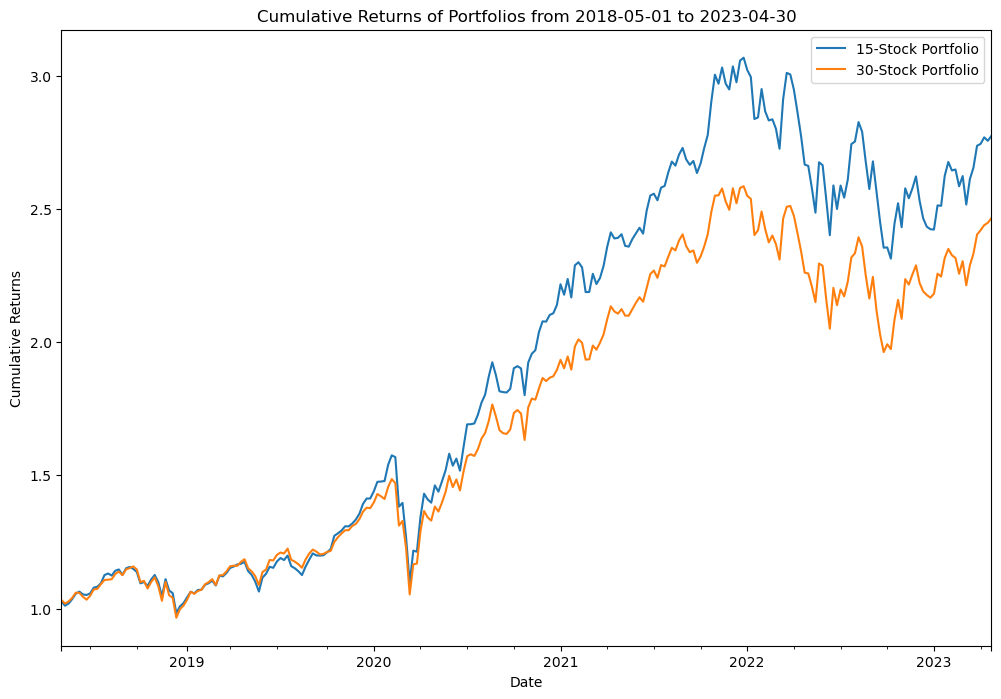

In [13]:
# 인덱스를 DateTimeIndex로 변환
cumulative_returns_15.index = pd.to_datetime(cumulative_returns_15.index)
cumulative_returns_30.index = pd.to_datetime(cumulative_returns_30.index)

# 누적 수익률 시각화
plt.figure(figsize=(12, 8))
cumulative_returns_15.plot(label='15-Stock Portfolio')
cumulative_returns_30.plot(label='30-Stock Portfolio')
plt.title('Cumulative Returns of Portfolios from 2018-05-01 to 2023-04-30')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [20]:
all_prices_15.to_csv('all_prices_15.csv')
all_prices_30.to_csv('all_prices_30.csv')

## **Mean-Variance Optimization**

In [18]:
import numpy as np
import cvxpy as cp
import cplex

ModuleNotFoundError: No module named 'cplex'

In [15]:
"""
불러온 Ticker들의 Adj Close를 수익률로 변환합니다.
Adj Close를 쓰고 싶은 경우에는 df를 쓰면됨
"""

ret = all_prices_15.pct_change().dropna()

In [16]:
# 변수 설정

num_assets = all_prices_15.shape[1] # 종목 개수가 나와야함
weights = cp.Variable((num_assets,1)) # 종목 개수랑 같아야함
ex_ret = np.mean(ret, axis=0) # 개별 종목 별 기대수익률
cov_mat = np.cov(ret.values.T) # 개별 종목 별 기대수익률을 구해서 Covariance Matrix를 만듦

In [17]:
# GMV

obj = cp.Minimize(cp.quad_form(weights, cov_mat)) # 목적식 설정

# weights >= 0 
const = [cp.sum(weights) == 1] # 제약식 설정, 공매도 원하면 위에 주석 가져다 옆으로 복붙하면됨

problem = cp.Problem(obj, const) # 문제 정의
problem.solve(verbose=False, solver=cp.CPLEX) # 문제 풀기

if problem.status == "optimal": # Solved 해가 최적의 해면 weights 출력
    print(weights.value)
    
    # print(max(weights.value)) # 가장 큰 weight를 보고싶으면 이거 주석 해제
else:
    print("It isn't optimal")

SolverError: The solver CPLEX is not installed.